# Diplomado: Data Science - Citi/ITAM  

<table border="0" width="95%" height="auto"><tr>
<td><center><img src="citibanamex-logo.png" border="0"></center></td>
<td><center><img src="ITAM.png" border="0"></center></td>
</tr></table>

## Módulo: Python

### Nombre: Cristian Armando, Flores Álvarez.



## EJERCICIO para entregar (1era parte)

1. Importa con la librería de pandas, como csv, los datos que vienen aquí: 

    - https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv y llámalo train_set
    
    - https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv y llámalo test_set

In [1]:
# Importamos librería pandas
import pandas as pd
# Importamos los archivos csv: 
train_set = pd.read_csv('train.csv', encoding='utf-8')
test_set = pd.read_csv('test.csv', encoding='utf-8')

2. Revisa [éste sitio](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) para que entiendas el reto. Busca la documentación que viene sobre el dataset para llenar la misma tabla que llenaste para R, en donde venga la descripción, el tipo de variable, los rangos.

### **Problem Statement**
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### **Problem**
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data dictionary

| Variable | Descripción | Tipo de dato |
| :-----------: |:-----------------------:|:-----------:|
| Loan_ID	| Unique Loan ID| ID |
| Gender 	| Male / Female | Categórica (M/F)|
| Married 	| Applicant married (Y/N)| Categórica (Y/N)|
| Dependents	| Number of dependents| Numérica |
| Education 	| Applicant Education (Graduate/ Under Graduate) | Categórica |
| Self_Employed	| Self employed (Y/N)| Categórica (Y/N) |
| ApplicantIncome | Applicant income| Numérica |
| CoapplicantIncome	| Coapplicant income| Numérica |
| LoanAmount	| Loan amount in thousands | Numérica |
| Loan_Amount_Term	| Term of loan in months| Numérica |
| Credit_History	| Credit History Meets Guidelines| Categórica (0/1) |
| Property_Area	| Urban/Semi Urban/Rural | Categórica|
| Loan_Status	| Loan approved (Y/N) | Categórica (Y/N)|

3. ¿Cuántas observaciones se tienen en cada dataset? ¿Cuántas columnas (puedes usar `dataframe.columns`)? ¿Cuáles son los primeros 5 registros?

In [2]:
# Registros en cada data set: 

#Usamos la función count sobre la variable ID de cada data set     
#Train
print(train_set['Loan_ID'].count())

614


In [3]:
#Test
print(test_set['Loan_ID'].count())

367


In [4]:
# Número de columnas:(Train)
print('Número de columnas Train Set: \n')
print(len(list(train_set.columns)))
print('Número de columnas Test Set: \n')
print(len(list(test_set.columns)))

Número de columnas Train Set: 

13
Número de columnas Test Set: 

12


In [5]:
#Otra forma usando shape de Numpy
import numpy as np
print('Número de filas y columnas del Train Set: \n')
print(train_set.shape)
print('Número de filas y columnas del Test Set: \n')
print(test_set.shape)
print('\nNombres de columnas del Train Set: \n')
print(list(train_set.columns))
print('\nNombres de columnas del Test Set: \n')
print(list(test_set.columns))

Número de filas y columnas del Train Set: 

(614, 13)
Número de filas y columnas del Test Set: 

(367, 12)

Nombres de columnas del Train Set: 

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Nombres de columnas del Test Set: 

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [6]:
# Primeros 5 registros: 
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


4. Observa cuántos **Na's** tienes por columna y por fila (usa la función que vimos para hacerlo para todas las columnas/filas de una vez). Elimina las filas en donde haya valores nulos.

In [7]:
# Definimos una función que cuente los NAs y usamos DF.apply() para aplicarlo a todas las columnas y filas a la vez 
def suma_NAs(x):
  return x.isnull().sum()

In [8]:
print("Número de Nas por columna: Train Set")
print(train_set.apply(suma_NAs, axis=0))
print("\nNúmero de Nas por columna: Test Set")
print(test_set.apply(suma_NAs, axis=0))

Número de Nas por columna: Train Set
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Número de Nas por columna: Test Set
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
print("Número de Nas por fila: Train Set")
print(train_set.apply(suma_NAs, axis=1).sum())
print("\nNúmero de Nas por fila: Test Set")
print(test_set.apply(suma_NAs, axis=1).sum())

Número de Nas por fila: Train Set
149

Número de Nas por fila: Test Set
84


In [10]:
# Eliminamos las filas donde hay valores nulos:
train_set.dropna(axis=0,how='any',inplace=True)
test_set.dropna(axis=0,how='any',inplace=True)

In [11]:
# Checamos las nuevas dimensiones de los DF
print('Número de filas y columnas Train Set: \n')
print(train_set.shape)
print('Número de filas y columnas Test Set: \n')
print(test_set.shape)

Número de filas y columnas Train Set: 

(480, 13)
Número de filas y columnas Test Set: 

(289, 12)


5. Recodifica a **0-1** las variables categóricas que estén siendo tratadas como strings. Usa la función `replace` que vimos, con un diccionario para hacer esto.

In [15]:
# Usamos un diccionario con las variables que queremos recodificar y los nuevos valores
train_set.replace(to_replace={'Gender':'Male','Married':'Yes','Self_Employed':'Yes','Loan_Status':'Y'}, 
                  value = 1,inplace=True)
train_set.replace(to_replace={'Gender':'Female','Married':'No','Self_Employed':'No','Loan_Status':'N'}, 
                  value = 0,inplace=True)

In [16]:
train_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
test_set.replace(to_replace={'Gender':'Male','Married':'Yes','Self_Employed':'Yes','Loan_Status':'Y'}, 
                  value = 1,inplace=True)
test_set.replace(to_replace={'Gender':'Female','Married':'No','Self_Employed':'No','Loan_Status':'N'}, 
                  value = 0,inplace=True)

In [18]:
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban
5,LP001054,1,1,0,Not Graduate,1,2165,3422,152.0,360.0,1.0,Urban


6. Da un resumen de la media, la mediana, desviación estándar, mínimo, máximo de las variables. Adicionalmente usa `df[col_name].value_counts()` para saber cuántas observaciones se tienen para las variables categóricas.

In [20]:
# Summary de las variables continuas de la base de datos
train_set[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [21]:
test_set[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4637.352941,1528.262976,136.792388,342.671280,0.840830
std,4790.683934,2377.599209,59.699582,65.655503,0.366469
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2875.000000,0.000000,102.000000,360.000000,1.000000
50%,3833.000000,879.000000,126.000000,360.000000,1.000000
75%,5000.000000,2400.000000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,460.000000,480.000000,1.000000


In [23]:
# Conteo de las variables categóricas de la base de datos
print(train_set['Loan_Status'].value_counts(),'\n')
print(train_set['Credit_History'].value_counts(),'\n')
print(train_set['Education'].value_counts(),'\n')
print(train_set['Gender'].value_counts(),'\n')
print(train_set['Education'].value_counts(),'\n')
print(train_set['Self_Employed'].value_counts(),'\n')
print(train_set['Property_Area'].value_counts(),'\n')
print(train_set['Married'].value_counts())

1    332
0    148
Name: Loan_Status, dtype: int64 

1.0    410
0.0     70
Name: Credit_History, dtype: int64 

Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

1    394
0     86
Name: Gender, dtype: int64 

Graduate        383
Not Graduate     97
Name: Education, dtype: int64 

0    414
1     66
Name: Self_Employed, dtype: int64 

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64 

1    311
0    169
Name: Married, dtype: int64


In [24]:
print(test_set['Credit_History'].value_counts(),'\n')
print(test_set['Education'].value_counts(),'\n')
print(test_set['Gender'].value_counts(),'\n')
print(test_set['Education'].value_counts(),'\n')
print(test_set['Self_Employed'].value_counts(),'\n')
print(test_set['Property_Area'].value_counts(),'\n')
print(test_set['Married'].value_counts())

1.0    243
0.0     46
Name: Credit_History, dtype: int64 

Graduate        224
Not Graduate     65
Name: Education, dtype: int64 

1    230
0     59
Name: Gender, dtype: int64 

Graduate        224
Not Graduate     65
Name: Education, dtype: int64 

0    257
1     32
Name: Self_Employed, dtype: int64 

Urban        113
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64 

1    187
0    102
Name: Married, dtype: int64


7. Para las variables categóricas, usa una `crosstab` para saber si se les da más créditos a las mujeres que a los hombres.  Usa otra `crosstab` para saber si el hecho de tener historial crediticio hace que sea más fácil que te aprueben un crédito. ¿Cuáles son tus conclusiones?
    **BONUS:** Investiga cómo poner porcentajes en estas tabla en vez de números.

In [25]:
# Usamos el argumento "normalize" para poner en % los valores de la tabla, 
# nota que nos interesa los resultados marginales por género:

pd.crosstab(train_set['Loan_Status'],train_set['Gender'],margins=True,normalize='columns')

Gender,0,1,All
Loan_Status,,,
0,0.372093,0.294416,0.308333
1,0.627907,0.705584,0.691667


Como se puede observar existe una ligera diferenciación por género en la asignación de los créditos, pues en el grupo de las mujeres el 63% obtienen el crédito, mientras que en el grupo de los hombres el 70% lo obtienen. 

In [27]:
# Monto crédito vs Historial crediticio
pd.crosstab(train_set['Loan_Status'],train_set['Credit_History'],margins=True,normalize='columns')

Credit_History,0.0,1.0,All
Loan_Status,,,
0,0.9,0.207317,0.308333
1,0.1,0.792683,0.691667


Se observa una clara diferencia entre tener o no historial crediticio para la asignación de un nuevo crédito, pues en el grupo de los que sí tienen historial al 80% se les autoriza uno nuevo, mientras que para aquellos que no tienen historial se les otorga solo al 10%.

Finalmente a continuación se muestra una tabla cruzada del historial crediticio vs género, ésto para observar si existe una diferenciación por género si se tiene o no historial.

In [28]:
pd.crosstab(train_set['Credit_History'],train_set['Gender'],margins=True,normalize='columns')

Gender,0,1,All
Credit_History,,,
0.0,0.162791,0.142132,0.145833
1.0,0.837209,0.857868,0.854167


Como podemos ver, la distribución por género de aquellos que tienen historial es muy similar (84% vs 86%).  

8. Haz un histograma para el ingreso de la persona y otro para la cantidad prestada. ¿Qué observas?

Histograma: Ingreso


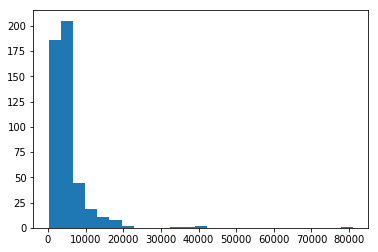

In [30]:
# Importamos librería 
import matplotlib.pyplot as plt
print("Histograma: Ingreso")
plt.hist(train_set['ApplicantIncome'], bins=25)
plt.show()

Se observa un sesgo en la distribución del ingreso hacia rangos bajos (menores a 10K unidades), además de la existencia de outliers (con ingresos muy altos por arriba de la media). 

Histograma: Monto del crédito


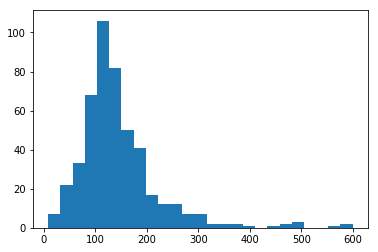

In [31]:
plt.clf()
print("Histograma: Monto del crédito")
plt.hist(train_set['LoanAmount'], bins=25)
plt.show()
#
# LoanAmount

La distribución del monto del crédito se observa con una mayor simetría que el ingreso, con una media entre 100 - 150 unidades, sin embargo también se observa la existencia de outliers que muy posiblemente se corresponan con aquellos clientes con ingresos muy altos.

9. Haz un boxplot para la cantidad del préstamo según el historial crediticio de la persona. ¿Hay diferencias en la cantidad prestada dependiendo si tiene historial o no? Repite el mismo boxplot pero ahora según el sexo. ¿Hay diferencias?


Box-Plot: Monto crédito by Historial crediticio


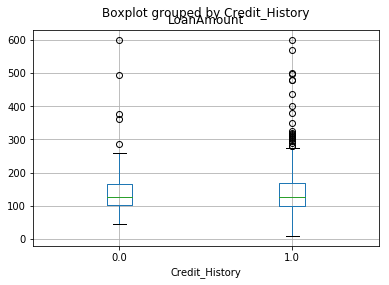

In [34]:
print("Box-Plot: Monto crédito por Historial crediticio")
train_set.boxplot(column='LoanAmount',by='Credit_History')


El box-plot nos muestra claramente que no existe una gran diferencia entre los montos de crédito caculados para los clientes con y sin historial crediticio, pues tanto la media, mediana y la longitud de los bigotes de las gráficas son práctimente iguales.

Box-Plot: Monto crédito por Género


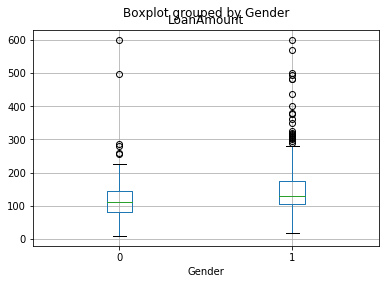

In [36]:
print("Box-Plot: Monto crédito por Género")
train_set.boxplot(column='LoanAmount',by='Gender')

El gráfico de arriba nos muestra nuevamente que existe una diferenciación por género, esta vez en los montos de crédito calculados, pues tanto la media, mediana y la logitud de los bitotes para el box-plot del monto del crédito para los hombres es mayor que el de las mujeres, por lo que podemos concluir que la base de datos viene cargada hacia créditos autorizados en su mayoría para hombres que para mujeres.